# Lung Cancer Data insights

## 1. Introduction :
#### The aim of this project is to find the factors influencing cause of cancer. We are solving a Classification problem.

#### Preliminaries : Loading the packages required to setup environment for our analysis

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# 2. Description of our Dataset
#### Loading our dataset to the dataframe. Then, we take look at the shape of our dataset and take a quick look at our dataset by printing first and last five rows.

In [47]:
# Loading our dataset in dataframe
df = pd.read_csv("/content/lung_cancer.csv")

In [48]:
# Shape of our dataset
df.shape

(61, 7)

In [49]:
# Printing first 5 rows of our dataset
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35.0,3.0,5,4.0,yes
1,John,Constantine,27.0,20.0,2,5.0,yes
2,Camela,Anderson,30.0,0.0,5,2.0,no
3,Alex,Telles,28.0,0.0,8,1.0,no
4,Diego,Maradona,68.0,4.0,5,6.0,yes


In [50]:
# Printing last 5 rows of our dataset
df.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
56,Charlton,Heston,75.0,15.0,3,5.0,yes
57,Gregory,Peck,43.0,30.0,3,8.0,yes
58,Sidney,Poitier,51.0,25.0,9,0.0,no
59,Alice,Johnson,36.0,NaN,7,NaN,yes
60,Bob,Smith,NaN,NaN,5,NaN,no


Observation : We found out that there are few NaN values in our dataset

# 3. Preprocessing and Data Cleaning for EDA

In [51]:
# Finding our null values in columns
df.isnull().sum()

Name       0
Surname    0
Age        1
Smokes     2
AreaQ      0
Alkhol     2
Result     0
dtype: int64

#### Observation : There are 2 each null values in Smokes and Alkhol columns. There is one null value in Age column

#### We will use Imputation technique which includes mean,median and mode to solve this issue. We will check which imputation can be used on this.

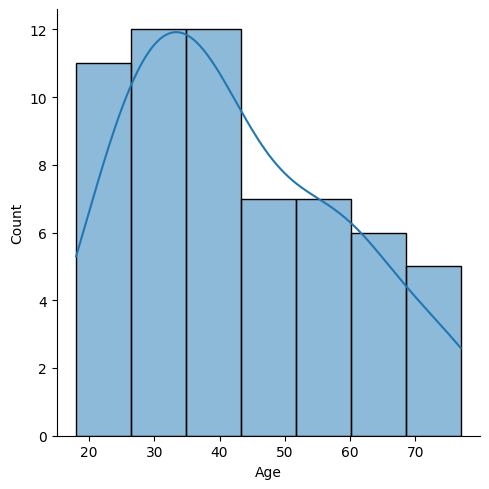

In [52]:
sns.displot(df["Age"], kde = True, edgecolor = "black")
plt.show()

#### Observation : Plot is left skewed, hence we will use median technique.

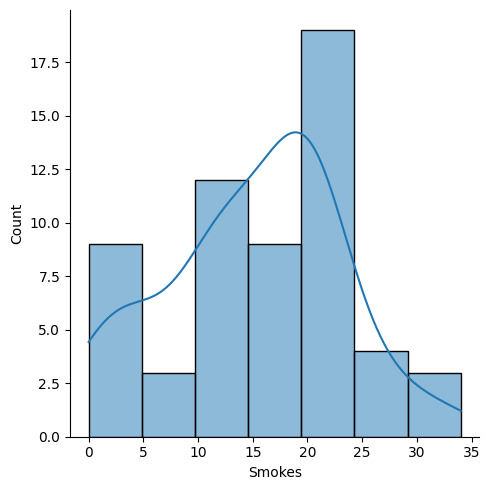

In [53]:
sns.displot(df["Smokes"], kde=True, edgecolor="black")
plt.show()

#### Observation : Plot is right skewed, hence we will use median technique.

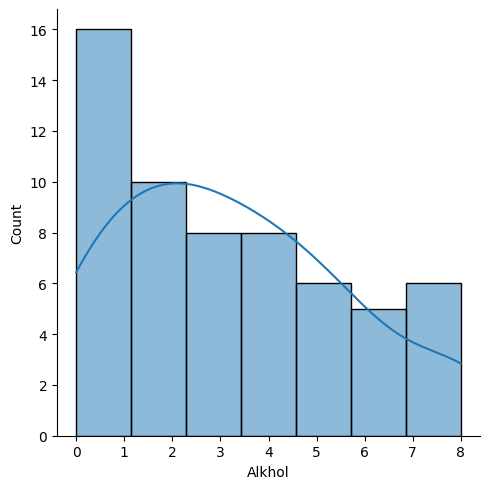

In [54]:
sns.displot(df["Alkhol"], kde = True, edgecolor="black")
plt.show()

#### Observation : Plot is slightly left skewed, hence we will use median technique.

Now, we will use median technique on all the three columns.

In [55]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [56]:
df["Smokes"].fillna(df["Smokes"].median(), inplace = True)

In [57]:
df["Alkhol"].fillna(df["Alkhol"].median(), inplace = True)

In [58]:
# Now, we will check if the null values are filled with median values or not

df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

#### Observation : We have replaced our null values with median values in three columns : Age, Smokes and Alkhol

In [59]:
# We will check if our dataset is balanced or not

df["Result"].value_counts()

Result
no     32
yes    29
Name: count, dtype: int64

#### Observation : We have ratio of 32-29, so its fairly balanced dataset, so no further action is needed to balance the dataset

Our "Result" column is our target column, we need to change it into form of 0s and 1s. We are going to use Label Encoding to this

In [60]:
# Applying Label Encoding
le = LabelEncoder()
df["Result"] = le.fit_transform(df["Result"])

In [61]:
# Printing first 5 rows to check if the label encoding got applied on our data or not
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35.0,3.0,5,4.0,1
1,John,Constantine,27.0,20.0,2,5.0,1
2,Camela,Anderson,30.0,0.0,5,2.0,0
3,Alex,Telles,28.0,0.0,8,1.0,0
4,Diego,Maradona,68.0,4.0,5,6.0,1


Observation : Label Encoder was successfull applied on Result column

# 4. Exploratory Data Analysis

#### 4-1. Statistics : Using describe function to get overview of statistics of our dataset

In [62]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,42.459016,15.065574,5.229508,3.229508,0.475410
std,15.991220,7.850412,2.431690,2.340893,0.503539
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.000000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


#### Observation:
#### 1) Approximately 50% people who smoke are below age 40. This group smokes approximately 15 cigarettes and consumes 3 drinks a day.

#### 2) One important insight, we got is that all the people who are affected by lung cancer are above age 39.


#### 4-2. Plotting barplot to know distribution of age column.

In [63]:
# Creating bins and labels as age is in form of bins
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Creating Age_Bins column
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df["Age_Bins"].value_counts().sort_index()
value_counts_sorted = df['Age_Bins'].value_counts().sort_index()

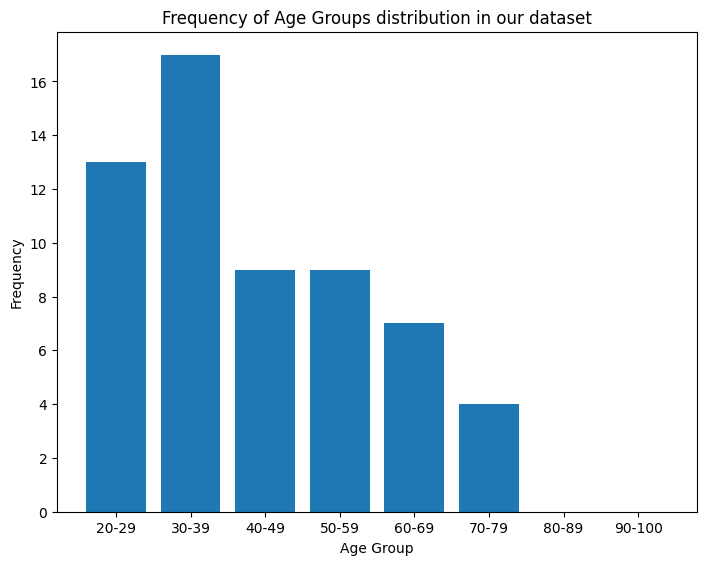

In [64]:
# Plotting bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(value_counts_sorted.index, value_counts_sorted)
plt.title('Frequency of Age Groups distribution in our dataset')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()


#### Observation : Majority of the people in our dataset are from age groups 20 to 39

#### 4.3 Plotting number of Cigarettes smoked by different age groups

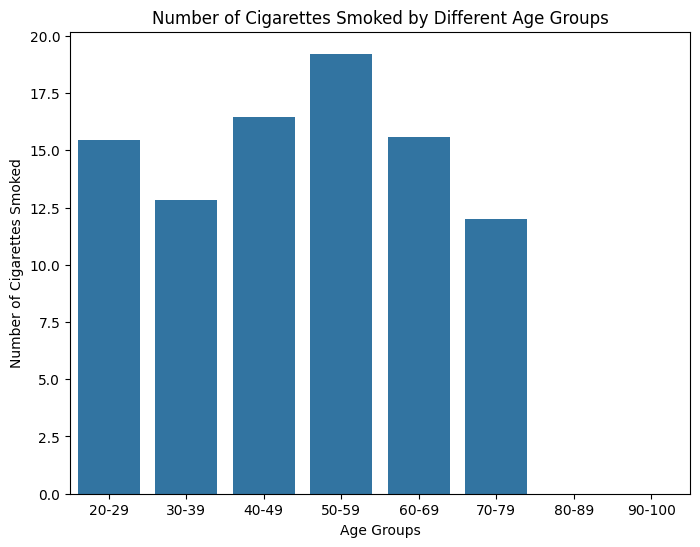

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Bins', y='Smokes', data=df, errorbar=None)
plt.title('Number of Cigarettes Smoked by Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Cigarettes Smoked')
plt.show()


Observation : Approximately 19 cigarettes are smoked by people of age group 50 to 59

#### 4-4 Pie chart to illustrate the distribution of daily drink consumption

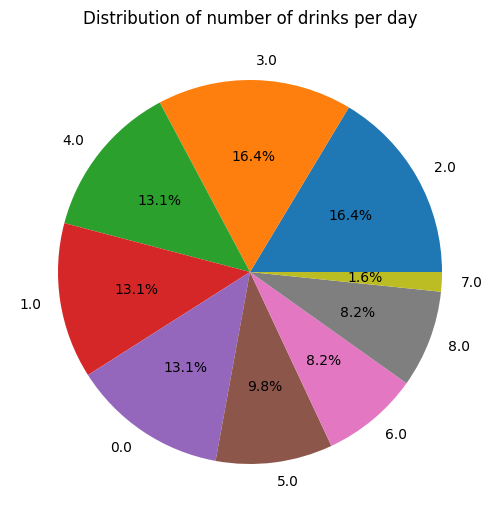

In [66]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
alk = df["Alkhol"].value_counts()
x = alk.values
y = alk.index
ax.pie(x, labels = y, autopct = "%1.1f%%")
plt.title("Distribution of number of drinks per day")
plt.show()

Observations : Approximately 33% people take 2 to 3 drinks per day

#### 4-5. Plotting barplot to know smoking and drinking habits

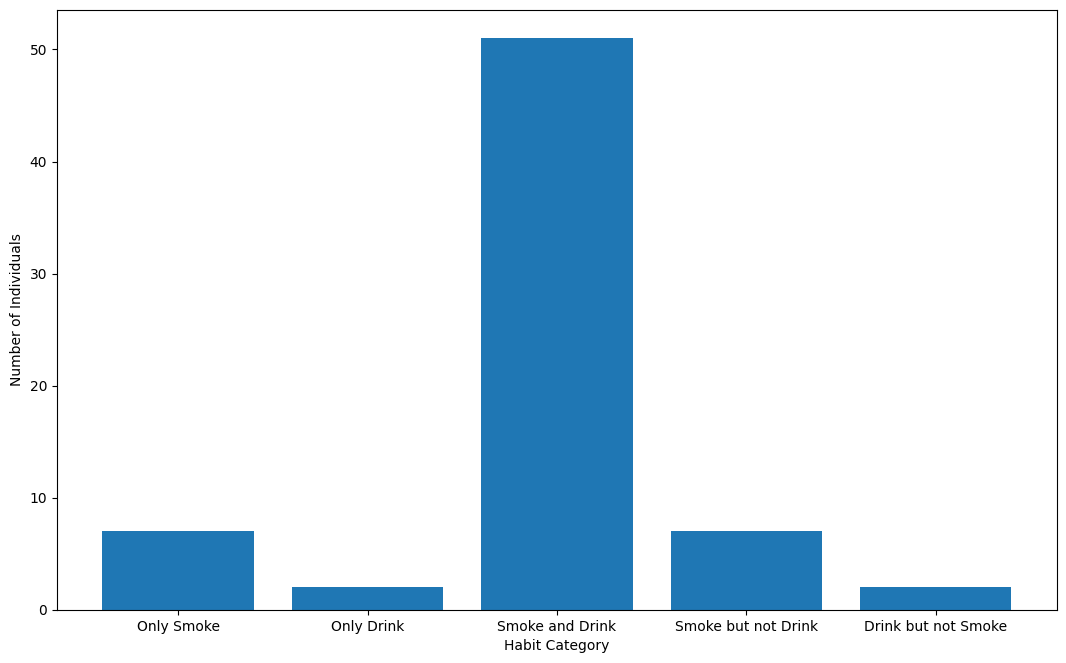

In [67]:
# Filter the DataFrame
only_smoke = df[(df["Alkhol"] == 0) & (df["Smokes"] > 0)]
only_drink = df[(df["Alkhol"] > 0) & (df["Smokes"] == 0)]
both_smoke_drink = df[(df["Alkhol"] > 0) & (df["Smokes"] > 0)]
smoke_not_drink = df[(df["Alkhol"] == 0) & (df["Smokes"] > 0)]
drink_not_smoke = df[(df["Alkhol"] > 0) & (df["Smokes"] == 0)]

# Count the number of individuals in each subset
counts = [len(only_smoke), len(only_drink), len(both_smoke_drink), len(smoke_not_drink), len(drink_not_smoke)]
categories = ['Only Smoke', 'Only Drink', 'Smoke and Drink', 'Smoke but not Drink', 'Drink but not Smoke']

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(categories, counts)
plt.xlabel('Habit Category')
plt.ylabel('Number of Individuals')
plt.show()


#### Observation: From our barplot, we come to know that majority of people do both smoking and drinking

#### 4.6 Plotting histogram to explore the age distribution of individuals affected by lung cancer.

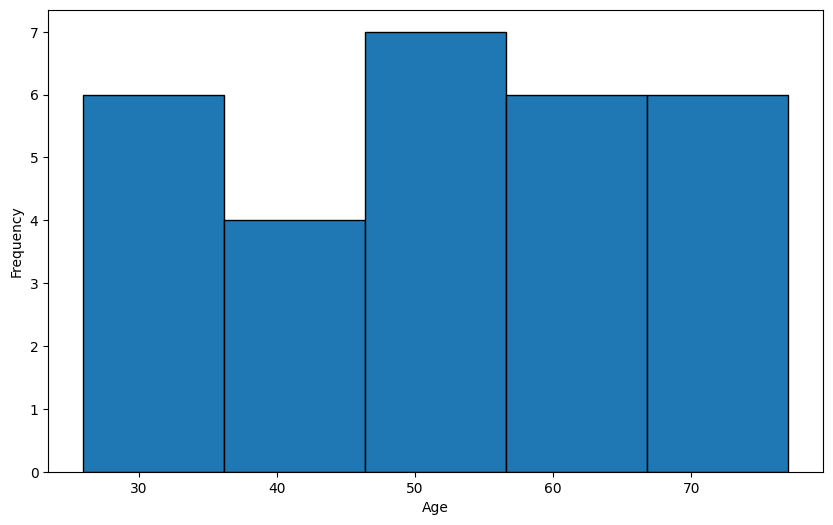

In [68]:
# People with lung cancer
lung_cancer_patients = df[df["Result"] == 1]
# Age group affected with lung cancer
age_data = lung_cancer_patients["Age"]


fig = plt.figure(figsize=(10,6))
plt.hist(age_data, bins = 5, edgecolor = "black")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Observation : Majority of people affected by Lung cancer are approximately above age 47.

#### 4.7 Plotting Scatter plot to understand relationship between age and smoking habits for the individuals in the dataset

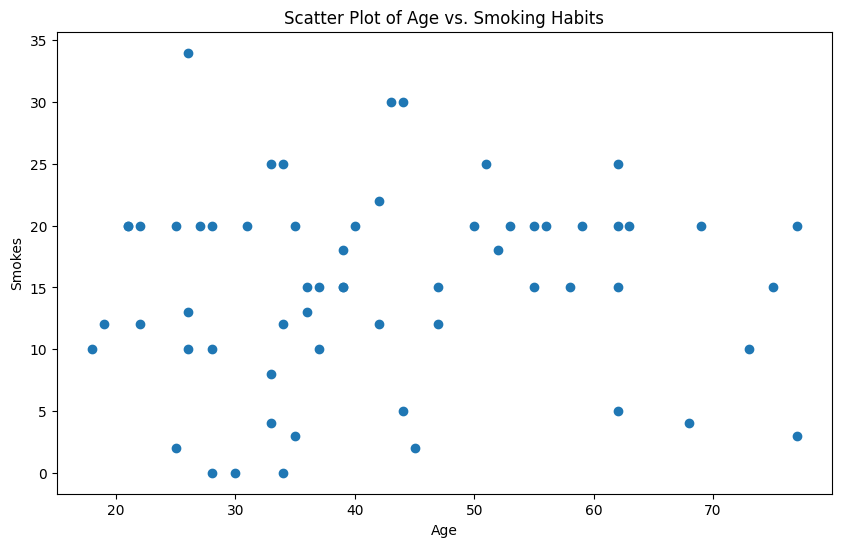

In [69]:
# Selecting appropriate columns
scatter_data = df[['Age', 'Smokes']]

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Age'], scatter_data['Smokes'])
plt.title('Scatter Plot of Age vs. Smoking Habits')
plt.xlabel('Age')
plt.ylabel('Smokes')
plt.show()


#### Observations:
#### 1) There is an outlier in our dataset where a user smokes approximately 35 cigarettes at the age of 27.

#### 2) Our data appears to be scattered.

#### 4.8 Plotting box plot to visually analyze the distribution  

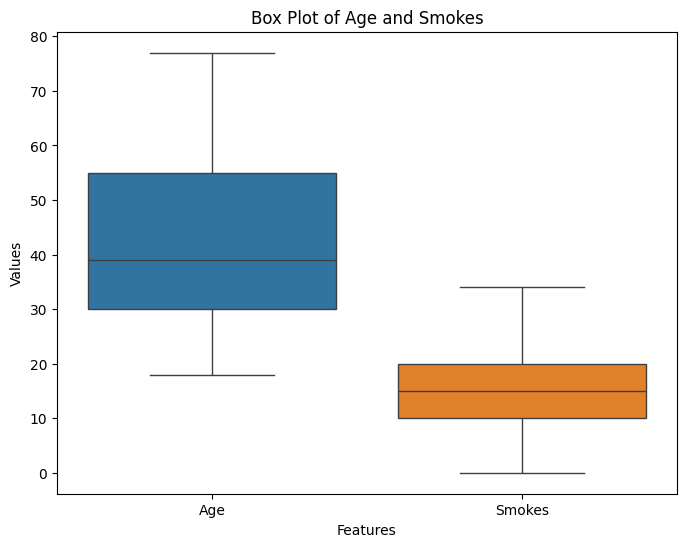

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Age', 'Smokes']])
plt.title('Box Plot of Age and Smokes')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

#### Observation : We plotted a box plot to visually analyze the distribution and spread of the 'Age' and 'Smokes' variables in the dataset. We were not able to see any outliers in our plot

#### 4.9 Heatmap

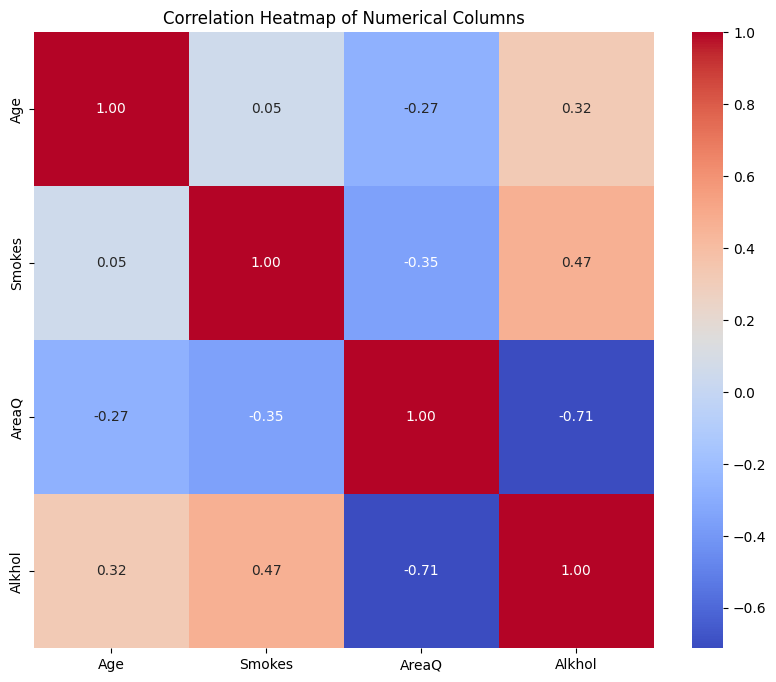

In [71]:
# Selecting numerical columns for the heatmap
numerical_columns = df[['Age', 'Smokes', 'AreaQ', 'Alkhol']]

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Observation : Heatmap shows us correlation between our numeric columns

# 5. Polishing our data for model training

#### 5.1 Outlier detection and treating using Z-score

In [72]:
# Detect outliers using z-score
z_scores = np.abs((df[['Age', 'Smokes', 'AreaQ', 'Alkhol']] - df[['Age', 'Smokes', 'AreaQ', 'Alkhol']].mean()) / df[['Age', 'Smokes', 'AreaQ', 'Alkhol']].std())
outliers = df[(z_scores > 3).any(axis=1)]

# Treat outliers by removing them
df_cleaned = df[(z_scores <= 3).all(axis=1)]

In [73]:
# shape of our original dataframe
df.shape

(61, 8)

In [74]:
# Shape after treating outliers.
df_cleaned.shape

(61, 8)

#### Observation : No outliers were detected. We found only one outlier in our  visual inspection while doing EDA which can be ignored. Outliers are not always bad

#### 5.2 One-Hot Encoding

#### We need to bring all the values of each column onto a common scale which will help us to train our model effiency. We are going to use Standarization technique for this. We have three categorical columns, hence performing one-hot encoding to convert categorical columns into numerical columns

In [75]:
# We have three categorical columns, hence performing one-hot encoding to convert categorical columns into numerical columns

# encoded_df = pd.get_dummies(df, columns=["Name", "Surname", "Age_Bins"])

# Droping Name and Surname columns as it not relevantlike we cannot get any insights from it.
encoded_df = df.drop(columns=["Name", "Surname"])

# Performing one-hot encoding on Age_Bins
encoded_df = pd.get_dummies(encoded_df, columns=["Age_Bins"])
encoded_df

,Age,Smokes,AreaQ,Alkhol,Result,Age_Bins_20-29,Age_Bins_30-39,Age_Bins_40-49,Age_Bins_50-59,Age_Bins_60-69,Age_Bins_70-79,Age_Bins_80-89,Age_Bins_90-100
0,35.0,3.0,5,4.0,1,False,True,False,False,False,False,False,False
1,27.0,20.0,2,5.0,1,True,False,False,False,False,False,False,False
2,30.0,0.0,5,2.0,0,False,True,False,False,False,False,False,False
3,28.0,0.0,8,1.0,0,True,False,False,False,False,False,False,False
4,68.0,4.0,5,6.0,1,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,75.0,15.0,3,5.0,1,False,False,False,False,False,True,False,False
57,43.0,30.0,3,8.0,1,False,False,True,False,False,False,False,False
58,51.0,25.0,9,0.0,0,False,False,False,True,False,False,False,False
59,36.0,15.0,7,3.0,1,False,True,False,False,False,False,False,False


In [76]:
# One-Hot Encoding result
encoded_df.head()

,Age,Smokes,AreaQ,Alkhol,Result,Age_Bins_20-29,Age_Bins_30-39,Age_Bins_40-49,Age_Bins_50-59,Age_Bins_60-69,Age_Bins_70-79,Age_Bins_80-89,Age_Bins_90-100
0,35.0,3.0,5,4.0,1,False,True,False,False,False,False,False,False
1,27.0,20.0,2,5.0,1,True,False,False,False,False,False,False,False
2,30.0,0.0,5,2.0,0,False,True,False,False,False,False,False,False
3,28.0,0.0,8,1.0,0,True,False,False,False,False,False,False,False
4,68.0,4.0,5,6.0,1,False,False,False,False,True,False,False,False


#### 5.3 Standarization

In [77]:
# Splitting data
# Splitting data before doing standarization
X = encoded_df.drop("Result", axis = 1)
y = encoded_df["Result"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=2)

In [78]:
# Applying Standarization
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [79]:
# Displaying Standarized training data
x_train_std

array([[-0.52872506, -0.39013376,  1.1303747 , -1.31666805, -0.51298918,
         1.64082531, -0.37796447, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [ 0.57204229,  0.33475993, -0.57853823,  0.7486936 , -0.51298918,
        -0.6094494 , -0.37796447,  2.42015348, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [-0.5898788 , -1.35665868,  1.1303747 , -1.31666805, -0.51298918,
         1.64082531, -0.37796447, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [-0.89564751,  0.57639117, -1.4329947 ,  1.98791058,  1.94935887,
        -0.6094494 , -0.37796447, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [ 0.02165862,  1.78454732, -1.00576647,  1.98791058, -0.51298918,
        -0.6094494 ,  2.64575131, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [-0.16180261,  0.57639117, -1.4329947 ,  1.57483826, -0.51298918,
        -0.6094494 ,  

In [80]:
# Displaying Standarized test data
x_test_std

array([[ 1.00011848,  0.57639117, -1.00576647,  0.33562127, -0.51298918,
        -0.6094494 , -0.37796447,  2.42015348, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [-0.46757132, -1.4774743 , -0.15131   ,  0.33562127, -0.51298918,
         1.64082531, -0.37796447, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [-0.89564751, -0.63176499, -0.57853823, -0.90359572,  1.94935887,
        -0.6094494 , -0.37796447, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [ 1.97857835, -0.02768691, -1.00576647,  0.7486936 , -0.51298918,
        -0.6094494 , -0.37796447, -0.41319694, -0.41319694,  3.87298335,
         0.        ,  0.        ],
       [ 0.08281236, -1.23584307,  1.1303747 , -0.90359572, -0.51298918,
        -0.6094494 ,  2.64575131, -0.41319694, -0.41319694, -0.25819889,
         0.        ,  0.        ],
       [-0.71218628,  0.57639117,  1.55760294,  0.33562127, -0.51298918,
         1.64082531, -

# 6. Model Building

In [81]:
# Training Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_std,y_train)
logistic_regression_predictions = logistic_regression.predict(x_test_std)



In [82]:
# Training Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_std, y_train)
dt_predictions = dt_model.predict(x_test_std)

In [83]:
# Training Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(x_train_std, y_train)
rf_predictions = rf_model.predict(x_test_std)

In [84]:
# Training Support Vector Machine model
svm_model = SVC()
svm_model.fit(x_train_std, y_train)
svm_predictions = svm_model.predict(x_test_std)

# 7. Model Evaluation

#### 7.1 Calculating accuracy of our models

In [85]:
# Calculating accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logisitc Regression Accuracy:", lr_accuracy*100)

# Calculating accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy*100)

# Calculating accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy*100)

# Calculating accuracy for Support Vector Machine
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy*100)

Logisitc Regression Accuracy: 92.3076923076923
Decision Tree Accuracy: 92.3076923076923
Random Forest Accuracy: 92.3076923076923
Support Vector Machine Accuracy: 92.3076923076923


#### Observation : We are getting high accuracy for all four of our machine learning models.

7.2 Calculating Precision, R2 score and F1 score

In [86]:
# Calculating precision, recall, and F1 score for Logistic Regression
lr_precision = precision_score(y_test, logistic_regression_predictions)
lr_recall = recall_score(y_test, logistic_regression_predictions)
lr_f1_score = f1_score(y_test, logistic_regression_predictions)

print("Decision Tree Precision:", lr_precision)
print("Decision Tree Recall:", lr_recall)
print("Decision Tree F1 Score:", lr_f1_score)


# Calculating precision, recall, and F1 score for Decision Tree
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1_score)

# Calculating precision, recall, and F1 score for Random Forest
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1_score)

# Calculating precision, recall, and F1 score for Support Vector Machine
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)

print("Support Vector Machine Precision:", svm_precision)
print("Support Vector Machine Recall:", svm_recall)
print("Support Vector Machine F1 Score:", svm_f1_score)


Decision Tree Precision: 1.0
Decision Tree Recall: 0.8333333333333334
Decision Tree F1 Score: 0.9090909090909091
Decision Tree Precision: 0.8571428571428571
Decision Tree Recall: 1.0
Decision Tree F1 Score: 0.923076923076923
Random Forest Precision: 1.0
Random Forest Recall: 0.8333333333333334
Random Forest F1 Score: 0.9090909090909091
Support Vector Machine Precision: 1.0
Support Vector Machine Recall: 0.8333333333333334
Support Vector Machine F1 Score: 0.9090909090909091


Observation : Precision, Recall and F1-score of all our four models is excellent

#### 7.3 Calculating confusion Matrix

In [87]:
# Calculate confusion matrix for Logisitc Regression
lr_conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
print("Logisitc Regression Confusion Matrix:")
print(lr_conf_matrix)

# Calculate confusion matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

# Calculate confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("\nRandom Forest Confusion Matrix:")
print(rf_conf_matrix)

# Calculate confusion matrix for Support Vector Machine
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("\nSupport Vector Machine Confusion Matrix:")
print(svm_conf_matrix)


Logisitc Regression Confusion Matrix:
[[7 0]
 [1 5]]
Decision Tree Confusion Matrix:
[[6 1]
 [0 6]]

Random Forest Confusion Matrix:
[[7 0]
 [1 5]]

Support Vector Machine Confusion Matrix:
[[7 0]
 [1 5]]


Observation : Our confusion matrix is working well

In [88]:
# Combine actual and predicted values for Logistic Regression
lr_results = pd.DataFrame({'Actual': y_test, 'Predicted': logistic_regression_predictions})
print("Logisitc Regression Actual vs Predicted:")
print(tabulate(lr_results, headers='keys', tablefmt='psql'))

# Combine actual and predicted values for Decision Tree
dt_results = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predictions})
print("Decision Tree Actual vs Predicted:")
print(tabulate(dt_results, headers='keys', tablefmt='psql'))

# Combine actual and predicted values for Random Forest
rf_results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print("\nRandom Forest Actual vs Predicted:")
print(tabulate(rf_results, headers='keys', tablefmt='psql'))

# Combine actual and predicted values for Support Vector Machine
svm_results = pd.DataFrame({'Actual': y_test, 'Predicted': svm_predictions})
print("\nSupport Vector Machine Actual vs Predicted:")
print(tabulate(svm_results, headers='keys', tablefmt='psql'))

Logisitc Regression Actual vs Predicted:
+----+----------+-------------+
|    |   Actual |   Predicted |
|----+----------+-------------|
| 36 |        1 |           1 |
|  0 |        1 |           0 |
| 47 |        0 |           0 |
| 56 |        1 |           1 |
| 23 |        0 |           0 |
| 46 |        0 |           0 |
| 35 |        0 |           0 |
| 28 |        1 |           1 |
| 50 |        0 |           0 |
| 32 |        1 |           1 |
|  1 |        1 |           1 |
| 30 |        0 |           0 |
| 44 |        0 |           0 |
+----+----------+-------------+
Decision Tree Actual vs Predicted:
+----+----------+-------------+
|    |   Actual |   Predicted |
|----+----------+-------------|
| 36 |        1 |           1 |
|  0 |        1 |           1 |
| 47 |        0 |           0 |
| 56 |        1 |           1 |
| 23 |        0 |           0 |
| 46 |        0 |           1 |
| 35 |        0 |           0 |
| 28 |        1 |           1 |
| 50 |        0 |           

# 8. Conclusion

#### 1. Lung cancer is caused among people who are above approximately 39 years old.

#### 2. All the 4 models used provided high accuracy.
